In [1]:
# Projeto 01
# Aluno: Jonnas Prado

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from joblib import dump, load


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier




df = pd.read_csv ('https://raw.githubusercontent.com/lucheol/in243/master/projeto/bananas.csv')

In [3]:
df.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,verde,NAO
1,18.081287,96.467236,verde,NAO
2,12.884049,95.604222,amarela,SIM
3,18.831052,96.641953,amarela,NAO
4,13.539014,92.978037,preta,NAO


In [4]:
#CRIAR VARIAVEL BOOL P/ CONSUMIVEL

swap = {
    "SIM": 1,
    "NAO": 0
}


df['pronto_para_consumo'] = df['pronto_para_consumo'].map(swap)
df.tail()

,temperatura,humidade,cor,pronto_para_consumo
995,15.117823,94.219190,amarela,1
996,12.191427,93.684571,preta,0
997,13.661092,97.370726,amarela,1
998,12.616746,99.843319,amarela,0
999,10.578951,92.611326,amarela,0


In [5]:
df['cor'].value_counts()

amarela    703
verde      194
preta      103
Name: cor, dtype: int64

In [6]:
df.count()

temperatura            1000
humidade               1000
cor                    1000
pronto_para_consumo    1000
dtype: int64

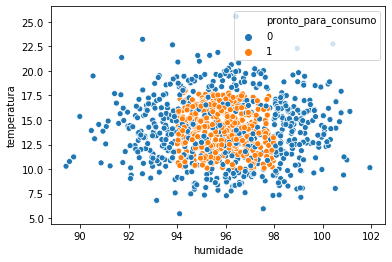

In [7]:
sns.scatterplot(x="humidade", hue="pronto_para_consumo", y='temperatura', data=df) #estratificação gráfica

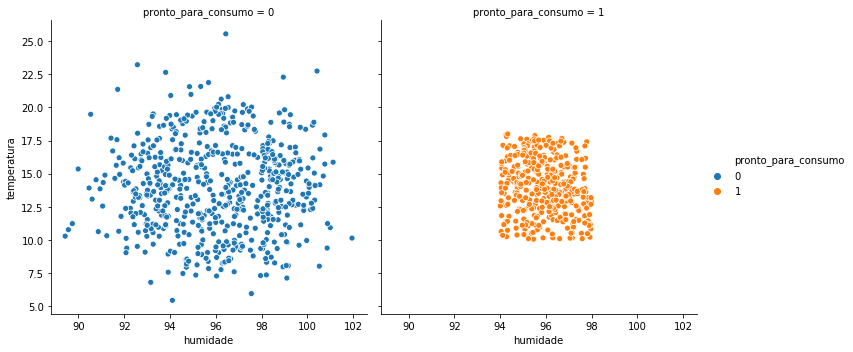

In [8]:
sns.relplot(x="humidade", hue="pronto_para_consumo", col='pronto_para_consumo', y='temperatura', data=df) #estratificação gráfica dados separados

In [9]:
split_banana = df['cor'].str.get_dummies()
split_banana.head()

,amarela,preta,verde
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0


In [10]:
split_banana.describe()

,amarela,preta,verde
count,1000.000000,1000.000000,1000.000000
mean,0.703000,0.103000,0.194000
std,0.457165,0.304111,0.395627
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [11]:
df2 = pd.concat([df, split_banana], axis=1)
df2 = df2[['temperatura', 'humidade', 'amarela', 'preta', 'verde', 'pronto_para_consumo']]
df2.head()

,temperatura,humidade,amarela,preta,verde,pronto_para_consumo
0,9.590963,97.007535,0,0,1,0
1,18.081287,96.467236,0,0,1,0
2,12.884049,95.604222,1,0,0,1
3,18.831052,96.641953,1,0,0,0
4,13.539014,92.978037,0,1,0,0


In [12]:
x = df2[['humidade','temperatura','amarela','preta','verde']]
y = df2['pronto_para_consumo']

In [13]:
#Normalização dos dados

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split (x,y, random_state=20, 
                                                         test_size = 0.25,
                                                         stratify=y
                                                        ) #com aleatoriedade e estratificado
scaler = StandardScaler()
scaler.fit(raw_treino_x)


treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [14]:
#baseline manual
len(teste_y)

250

In [15]:
baseline = pd.np.ones(250) #se eu chutar que os 540 serão 1, qual a taxa de acerto?
taxa_acuracia_manual = accuracy_score(teste_y, baseline)
print(f"Accuracy: {taxa_acuracia_manual*100}%")

Accuracy: 39.2%


In [16]:
# Baseline automático
dummy_stratified = DummyClassifier(strategy="prior")
dummy_stratified.fit(treino_x, treino_y)
taxa_acuracia_auto = dummy_stratified.score (teste_x, teste_y)
print(f"Accuracy: {taxa_acuracia_auto*100}%")

Accuracy: 60.8%


In [17]:
################################################################################################################################

In [18]:
# 1 - Método SVC


svc = SVC(random_state=20)
svc.fit(treino_x, treino_y)
previsoes_svc = svc.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes_svc)
print(f"Accuracy: {taxa_acuracia*100}%")

Accuracy: 94.39999999999999%


In [19]:
################################################################################################################################

In [20]:
#2 -  Método dos vizinhos Próximos


from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(treino_x, treino_y)
previsoes_neigh = neigh.predict(teste_x)


taxa_acuracia = accuracy_score(teste_y, previsoes_neigh)
print(f"Accuracy: {taxa_acuracia*100}%")

Accuracy: 98.0%


In [24]:
# 3 - DECISION TREE
#Escalar os eixos, pois o SVC nao opera bem com escalas ruins


#from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt


dec_tree = DecisionTreeClassifier()
dec_tree.fit(treino_x, treino_y)
previsoes_dec_tree = dec_tree.predict(teste_x)


taxa_acuracia = accuracy_score(teste_y, previsoes_dec_tree)
print(f"Accuracy: {taxa_acuracia*100}%")

Accuracy: 98.4%


In [25]:
#exemplo de export/import
dump(dec_tree, 'tree_model.joblib')
loaded_model = load('tree_model.joblib')

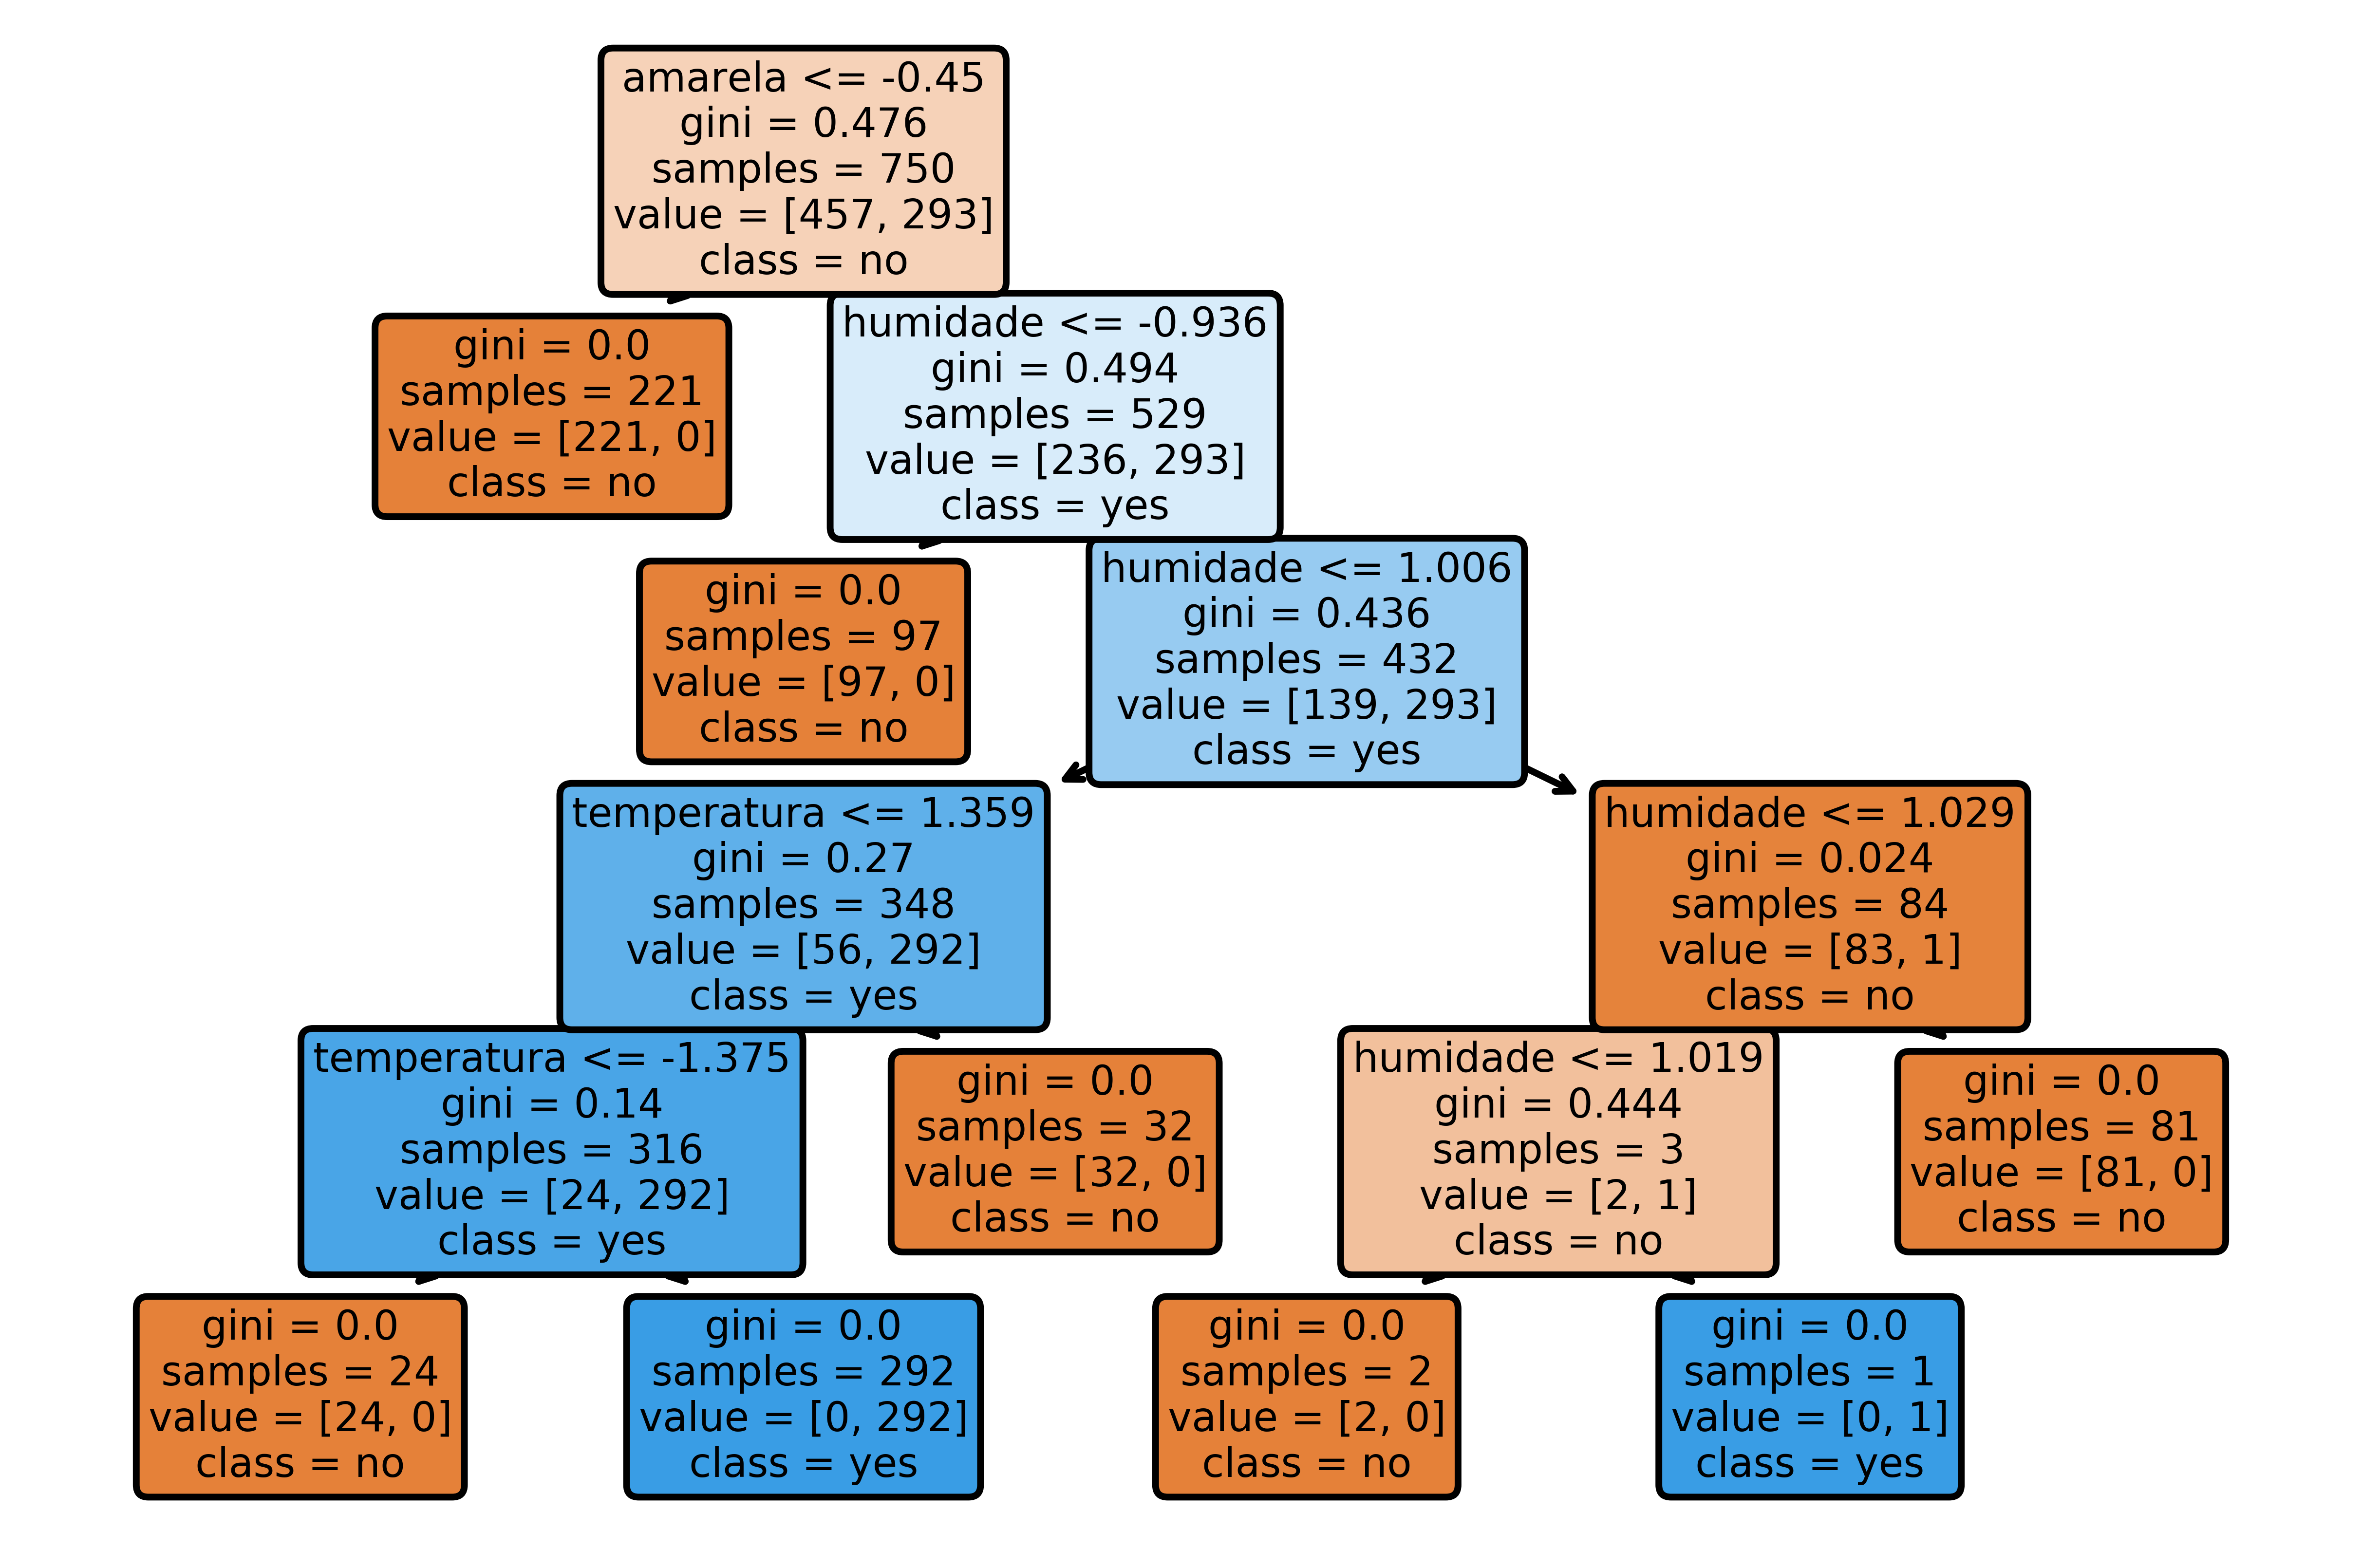

In [26]:
#visualizar regras da arvore de decisão

features = x.columns

plt.figure (dpi=1000)
plot_tree(dec_tree, max_depth=5,
          filled = True,
          feature_names=features,
          rounded=True,
          class_names = ['no', 'yes']
         )
plt.show()

In [27]:
# Agrupando dados do modelo no dataset original

data_input = scaler.transform(x)

df_prevsvc = pd.DataFrame(svc.predict(data_input), columns=['previsto'])
df_prevneigh = pd.DataFrame(neigh.predict(data_input), columns=['previsto'])
df_prevdec_tree = pd.DataFrame(dec_tree.predict(data_input), columns=['previsto'])

In [28]:
df_svc = pd.concat([df2, df_prevsvc], axis=1)
df_linear = pd.concat([df2, df_prevneigh], axis=1)
df_dec_tree = pd.concat([df2, df_prevdec_tree], axis=1)

In [29]:
df_prevsvc = pd.concat([df2, df_prevsvc], axis=1)
df_prevneigh = pd.concat([df2, df_prevneigh], axis=1)
df_prevdec_tree = pd.concat([df2, df_prevdec_tree], axis=1)

In [30]:
# comparando previsão e real
def acertos(row):
    if row['pronto_para_consumo'] == row['previsto']:
        return True
    else:
        return False

In [31]:
# Aplicando a Função nos DataFrames
df_prevsvc['acertos'] = df_prevsvc.apply(acertos, axis=1)
df_prevneigh['acertos'] = df_prevneigh.apply(acertos, axis=1)
df_prevdec_tree['acertos'] = df_prevdec_tree.apply(acertos, axis=1)

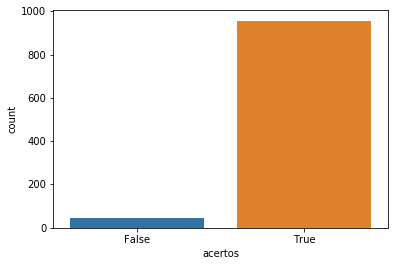

In [34]:
sns.countplot(x='acertos', data=df_prevsvc)

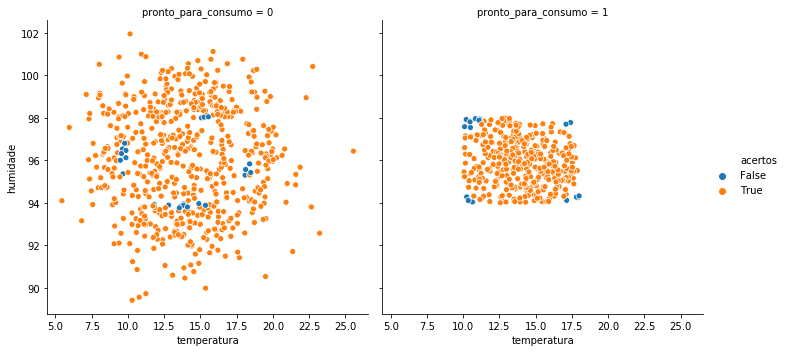

In [36]:
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='acertos', data=df_prevsvc)

In [ ]:
sns.countplot(x='acertou', data=df_prevneigh)

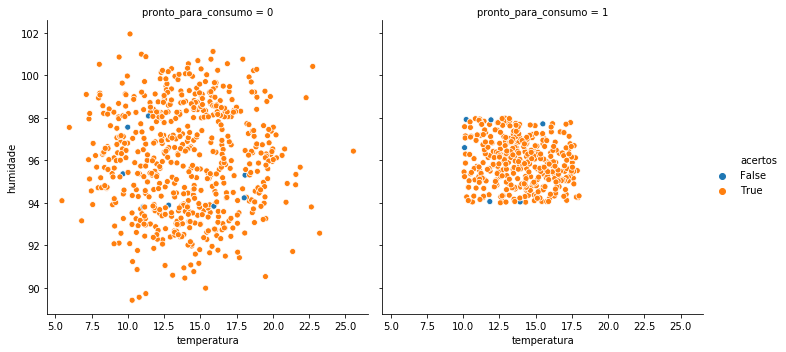

In [37]:
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='acertos', data=df_prevneigh)

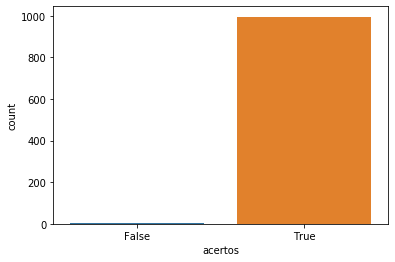

In [39]:
sns.countplot(x='acertos', data=df_prevdec_tree)

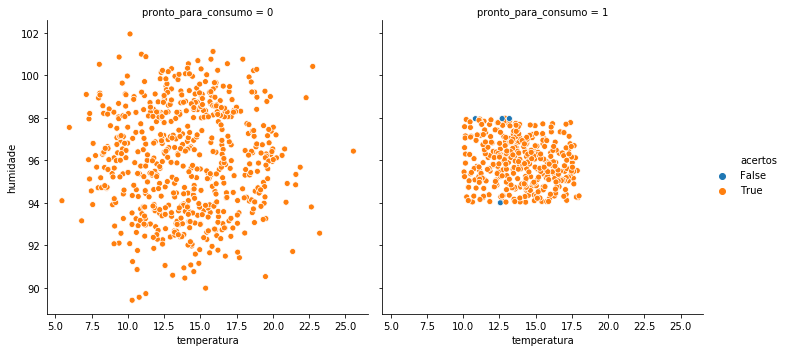

In [38]:
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='acertos', data=df_prevdec_tree)